In [53]:
import numpy as np
import pandas as pd
import sys
from scipy.special import comb
import matplotlib.pyplot as plt
NBA_YEARS = range(1950, 2021)
MLB_YEARS = range (1903,2019)

In [54]:
def generate_collapse_scores_by_year(league, year, flat=True):
    df = pd.read_csv("data/" + league + "/" + str(year) + ".csv")
    
    season = {}
    
    for index, row in df.iterrows():
        home_team = row["home_team"]
        away_team = row["away_team"]
        home_win = row["home_team_score"] > row["away_team_score"]
               
        season[home_team] = np.append(season.get(home_team, np.array([])), home_win)
        season[away_team] = np.append(season.get(away_team, np.array([])), not home_win)
        
    # remove playoffs by finding minimum games played and only retaining those    
    
    regular_season_length = sys.maxsize
    
    for team in season:
        num_team_games = len(season[team])
        if num_team_games < regular_season_length:
            regular_season_length = num_team_games
            
    for team in season:
        season[team] = season[team][:regular_season_length]
        
    season_end_length = 10 if flat else round(regular_season_length / 2)
        
    # calculate collapse scores    
        
    collapse_scores = {}
    
    for team in season:
        games = season[team]
        
        win_pct = np.sum(games) / len(games)
        season_end_wins = int(np.sum(games[-season_end_length:]))
        
        probability = 0
        
        for wins in range(0, season_end_wins + 1):
            temp = comb(season_end_length, wins) * win_pct ** wins * (1 - win_pct) ** (season_end_length - wins)
            probability += temp
            
        collapse_scores[team] = 1 / probability
        
    return collapse_scores

def generate_collapse_scores(league, years):
    collapse_scores = {}
    team_years = {}
    
    for year in years:
        year_collapse_scores = generate_collapse_scores_by_year(league, year)
        
        for team in year_collapse_scores:
            collapse_scores[team] = np.append(collapse_scores.get(team, np.array([])), year_collapse_scores[team])
            team_years[team] = np.append(team_years.get(team, np.array([])), year)
            
    return collapse_scores, team_years

In [6]:
collapse_scores,team_years=generate_collapse_scores("nba", NBA_YEARS)

In [7]:
print(collapse_scores)

{'TRI-CITIES BLACKHAWKS': array([1.14161241, 1.12425107]), 'DENVER NUGGETS': array([7.05042235, 1.68644852, 1.52971419, 1.03340435, 2.12288125,
       1.02869198, 4.18911933, 1.35770084, 2.12944174, 1.89056612,
       4.6608844 , 1.11534569, 1.10481977, 3.43858484, 1.27357489,
       3.87535977, 6.20969569, 1.31356619, 1.23856498, 1.20754717,
       1.77116093, 4.3371128 , 1.1633639 , 2.28399653, 1.08401214,
       1.18007856, 1.07813902, 2.8239074 , 1.27357489, 1.04701295,
       3.43858484, 1.0024835 , 1.68644852, 1.10481977, 2.01573275,
       1.22479266, 1.03466076, 1.16531705, 1.8763276 , 2.12288125,
       2.65828914, 1.53217031, 1.12651082, 4.34627927, 4.93619273]), 'CHICAGO STAGS': array([11.61462361]), 'NEW YORK KNICKS': array([  1.70981031,   1.33535403,   1.12594304,   2.49247015,
         1.69640947,   1.08353118,   1.17652183,   1.20754717,
         1.52272491,   1.38493954,  13.09225265,   4.75646359,
         2.08312667,   4.60765003,   2.21202931,   1.04826144,
        

[(1.6417863454435913, 1953.0), (1.662889361417327, 1962.0), (1.7933830383683877, 1969.0), (1.8691929512568268, 1952.0), (2.016966251356759, 1951.0), (2.0522577775948294, 2008.0), (2.1179648230224353, 2002.0), (2.1473052656347393, 1958.0), (2.184064926325361, 1987.0), (2.219116900502618, 1959.0), (2.249444805247516, 1988.0), (2.259675264362803, 1986.0), (2.3559345250521004, 1982.0), (2.385044967048686, 1974.0), (2.4164358656451776, 2003.0), (2.4359850761256077, 1956.0), (2.4365055520792374, 1990.0), (2.4803403163613416, 1996.0), (2.593712699581609, 1998.0), (2.5975163489435, 2019.0), (2.6156415794602315, 1991.0), (2.620202173955577, 1957.0), (2.6268048596665583, 1980.0), (2.667768348108654, 1981.0), (2.678102329625069, 1997.0), (2.6840408618948586, 1976.0), (2.687658419431911, 2009.0), (2.6946223935596283, 1992.0), (2.7324514720372233, 1984.0), (2.7337783905391744, 2018.0), (2.7711462207668562, 2001.0), (2.8310880273201464, 2006.0), (2.861704067368, 1966.0), (2.8713677471382986, 2017.0)

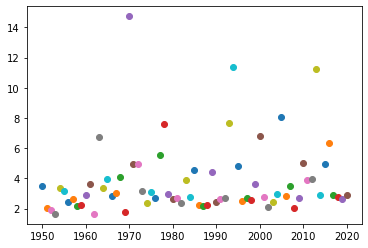

In [51]:
#average collapse score over time in NBA
yearDict={}
for i in zip(collapse_scores, team_years):
    for x in zip(collapse_scores[i[0]],team_years[i[0]]):
        if(x[1] not in yearDict):
            yearDict[x[1]]=[x[0]]
        else:
            yearDict[x[1]].append(x[0])
avgYearDict={}
for x in yearDict:
    avgYearDict[x]=sum(yearDict[x])/len(yearDict[x])
sort=(sorted(list(avgYearDict.values())))
sortedList=[]
for i in sort:
    sortedList.append((i,list(avgYearDict.keys())[list(avgYearDict.values()).index(i)]))
for i in zip(avgYearDict.keys(),avgYearDict.values()):
    plt.scatter(i[0],i[1])
print(sortedList)
    
    
    
    
    
    
    

In [ ]:
#Average MLB Collapse Score Over Time
collapse_scores,team_years=generate_collapse_scores("mlb", MLB_YEARS)